<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
display(data.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [60]:
import warnings
warnings.filterwarnings('ignore')

### Вывод

Изходя из данныйх полученных методом info() в данных большое колличесво пропусков, некоторые стобцы содержат неверный тип данных, есть некоррекно оформленные заголовки столбцов, необходимо провести предобработку данных.

## Предобработка данных

Первый этап работаем с пропусками. Проверим долю пропущенных значений по столбцам

In [61]:
print(data.isna().mean())

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64


Пропуски в столбце "balcony" - могут обозначать отсутствие балкона в квартире, поэтому логично заменить их на 0

In [62]:
data.loc[data['balcony'].isnull(), 'balcony'] = 0

Аналогичная ситуация со столбцом "is_apartment", пропуски в нем можно объянить, что данное объявление относиться к квартире. Поэтому пропуски логично заменить на False

In [63]:
data.loc[data['is_apartment'].isnull(), 'is_apartment'] = False
data.is_apartment.unique()

array([False, True], dtype=object)

Самый небольшой процент пропусков в столбцах "locality_name" и "floors_total" - эти строки можно удалить без ьпотери качества данных в файле

In [64]:
data = data.dropna(subset=['locality_name'])
data.drop(data[data['floors_total'].isnull()].index, inplace=True)

Пропуски в столбцах "ceiling_height", "living_area" и "kitchen_area" - логично заменить медианным значением по столбцу

In [65]:
ceiling_height_avg = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(value=ceiling_height_avg)
living_area_avg = data['living_area'].median()
data['living_area'] = data['living_area'].fillna(value=living_area_avg)
kitchen_area_avg = data['kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(value=kitchen_area_avg)

Пропуски в столбце "cityCenters_nearest" можно заполнить медианным значением по столбцу, предварительно сгрупировав данные по населенным пунктам

In [66]:
cityCenters_nearest_avg = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value=cityCenters_nearest_avg)

Пропуски в столбце "airports_nearest" можно заменить медианным значением по столбцу, т.к. аэропорты могут быть только в крпных городах области

In [67]:
airports_nearest_avg = data['airports_nearest'].median()
data['airports_nearest'] = data['airports_nearest'].fillna(value=airports_nearest_avg)

Пропуски в столбце "days_exposition" скорее всего связаны с тем, что объявление еще не снято с публикации, заменим пропуски значеннием 0

In [68]:
data['days_exposition'] = data['days_exposition'].fillna(0)

Приведем значение столбца "first_day_exposition" к значению дата, т.к. время не указано

In [69]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

Приведем данные в стобцах к целым числам, где это необходимо

In [70]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

Переменуем некотороые столбцы для удобства восприятия информации

In [71]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

In [72]:
data.info()
display(data.head(15))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159.00,2015-07-24,3,2.65,14,30.00,9,False,...,9.10,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,26757.0,NaN,NaN,NaN,NaN,NaN,55
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.00,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,посёлок Мурино,26757.0,NaN,NaN,NaN,NaN,NaN,189
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289


В результате предобработки данных удалось получить более пригодные данные для анализа. заполнили большенство пропусков, привели наименование столбцов к единому стилю, привели типы данных в столбцах в соотвествии типом информации хранящемся в данном столбце. 

## Расчёты и добавление результатов в таблицу

In [73]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')
data['day'] = data['first_day_exposition'].dt.day
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

def floor_name(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
data['floor_name'] = data.apply(floor_name, axis = 1)
print(data['floor_name'].value_counts())

data['living_total'] = data['living_area'] / data['total_area']

data['kitchen_total'] = data['kitchen_area'] / data['total_area']

display(data.head(20))


другой       17326
последний     3330
первый        2909
Name: floor_name, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,day,month,year,floor_name,living_total,kitchen_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,755.0,0,120370,7,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,NaN,81,82920,4,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2.0,574.0,558,92785,20,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14,30.00,9,False,...,3.0,234.0,424,408176,24,7,2015,другой,0.188679,0.057233
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121,100000,19,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,55,95065,10,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.0,NaN,155,99195,2,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.00,22,False,...,0.0,NaN,0,110544,18,4,2019,другой,0.418994,0.263966
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,NaN,189,87454,23,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,NaN,289,88524,26,2,2017,другой,0.714754,0.106557


## Исследовательский анализ данных

In [74]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23565.000000,2.356500e+04,23565.000000,23565.000000
mean,60.322824,6.540058e+06,2.070656,2.724530
std,35.657060,1.091093e+07,1.078591,0.991026
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.646000e+06,2.000000,2.650000
75%,69.700000,6.790000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


<AxesSubplot:>

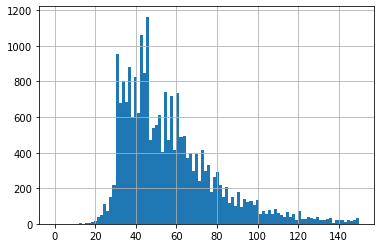

In [75]:
data['total_area'].hist(bins=100, range=(0, 150))

<AxesSubplot:xlabel='total_area'>

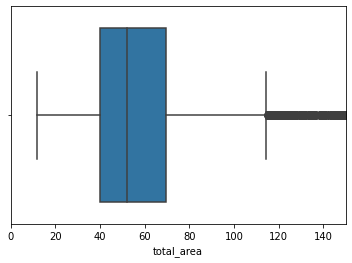

In [76]:
plt.xlim(0, 150)
sns.boxplot(data['total_area'])

<AxesSubplot:>

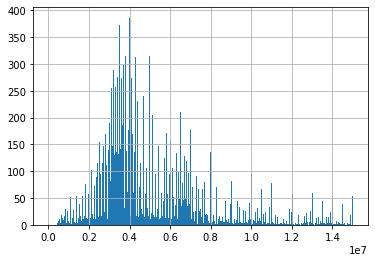

In [77]:
data['last_price'].hist(bins=500, range=(0, 15000000))

<AxesSubplot:xlabel='last_price'>

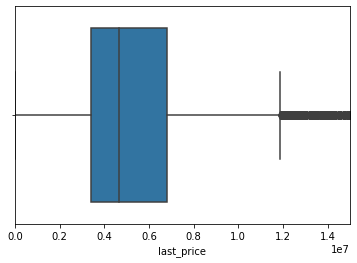

In [78]:
plt.xlim(0, 15000000)
sns.boxplot(data['last_price'])

<AxesSubplot:>

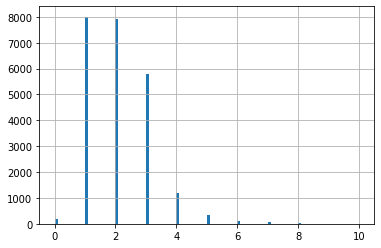

In [79]:
data['rooms'].hist(range=(0, 10), bins=100)

<AxesSubplot:xlabel='rooms'>

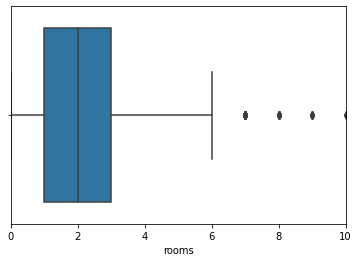

In [80]:
plt.xlim(0, 10)
sns.boxplot(data['rooms'])

<AxesSubplot:>

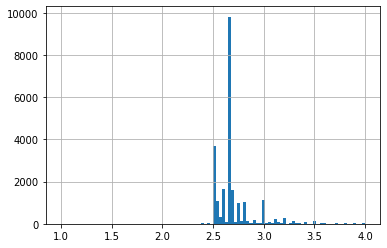

In [81]:
data['ceiling_height'].hist(bins=100, range=(1, 4))

<AxesSubplot:xlabel='rooms'>

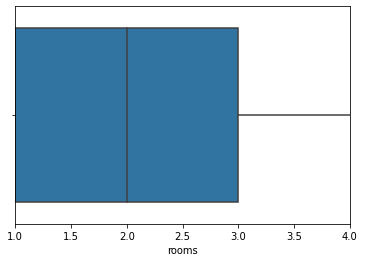

In [82]:
plt.xlim(1, 4)
sns.boxplot(data['rooms'])

На основании предоставленных данных можно сделать вывод по характеристикам средней квартиры предоставленной на рынке - это 2-х комнатнатная квартира, средней площадью 52 квадратных метра, с высотой потолком 2,65 метра и средней стоимостью 4,8 миллиона рублей

In [83]:
data[['days_exposition']].describe()

,days_exposition
count,23565.000000
mean,156.420115
std,213.517293
min,0.000000
25%,22.000000
50%,73.000000
75%,198.000000
max,1580.000000


In [84]:
print(data['days_exposition'].median())
print(data['days_exposition'].mean())

73.0
156.42011457670273


array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

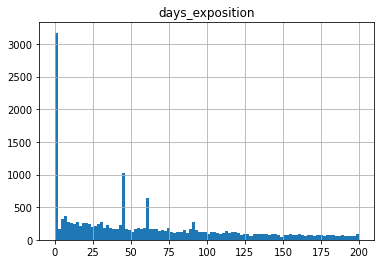

In [85]:
data[['days_exposition']].hist(bins=100, range=(0, 200))

<AxesSubplot:xlabel='days_exposition'>

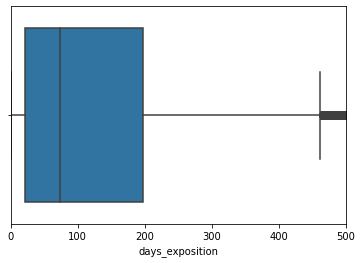

In [86]:
plt.xlim(0, 500)
sns.boxplot(data['days_exposition'])

Проанализаровав данные о количестве дней размещения объявления можно сделать вывод: долгими продажами можно назвать объявления которые были опубликованы более 12 меясцев, возможно цена данных объектов недвижимости является завышенной, либо данные объекты недвижимости не ликвидны на рынке. Короткий срок размещения объявления менее 30 дней может говорить либо о значительной снижении стоимости объекта, в связи со срочной продажей, либо о возможной мошеннической схеме - можно наблюдать аномальное колличесво объявлений снятых с публикации через считанные дни.

In [87]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000
mean,60.322824,6.540058e+06,2.070656,2.724530,156.420115
std,35.657060,1.091093e+07,1.078591,0.991026,213.517293
min,12.000000,1.219000e+04,0.000000,1.000000,0.000000
25%,40.000000,3.400000e+06,1.000000,2.600000,22.000000
50%,52.000000,4.646000e+06,2.000000,2.650000,73.000000
75%,69.700000,6.790000e+06,3.000000,2.700000,198.000000
max,900.000000,7.630000e+08,19.000000,100.000000,1580.000000


Выявление аномалий в данных

In [88]:
def emissions(column):
    statistics = data[column].describe()
    scope = statistics[6] - statistics[4]
        
    left_mustache = round(statistics[4] - 1.5 * scope, 2)
    right_mustache = round(statistics[6] + 1.5 * scope, 2)
    if left_mustache < statistics[3]: left_mustache = statistics[3] 
    if right_mustache > statistics[7]: right_mustache = statistics[7]
    return [left_mustache, right_mustache]

In [89]:
emissions('total_area')

[12.0, 114.25]

In [90]:
emissions('last_price')

[12190.0, 11875000.0]

In [91]:
emissions('rooms')

[0.0, 6.0]

In [92]:
emissions('ceiling_height')

[2.45, 2.85]

In [93]:
emissions('days_exposition')

[0.0, 462.0]

К анномалиям в данныхможно отнести: квартиры имеющие более 6 комнат, квартиры площадью более 200 квадратных метров, квартры где высота потолком меньше 1 метра и там где выше 4 метров, квартиры стоимостью более 20 миллионов рублей, квартиры срок публикации объявления о которым больше года

Исключение аномальных значений из данных

In [94]:
data['final_large_area'] = data['total_area'] > emissions('total_area')[1]
data['final_expensive'] = data['last_price'] > emissions('last_price')[1]
data['final_rooms'] = data['rooms'] > emissions('rooms')[1]
data['final_ceiling'] = (data['ceiling_height'] > emissions('ceiling_height')[1]) \
                        | (data['ceiling_height'] < emissions('ceiling_height')[0])
data['slow_sale'] = data['days_exposition'] > emissions('days_exposition')[1]
data['fast_sale'] = data['days_exposition'] < 30

final_data = data[(data['final_large_area'] == False) & 
     (data['final_expensive'] == False) &
     (data['final_rooms'] == False) &
     (data['final_ceiling'] == False) &
     (data['slow_sale'] == False) &
     (data['fast_sale'] == False)].reset_index(drop=True)
display(final_data.head(15))
final_data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,year,floor_name,living_total,kitchen_total,final_large_area,final_expensive,final_rooms,final_ceiling,slow_sale,fast_sale
0,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,2018,первый,0.460396,0.272277,False,False,False,False,False,False
1,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,2018,другой,0.473684,0.299342,False,False,False,False,False,False
2,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,2017,другой,0.284182,0.386059,False,False,False,False,False,False
3,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,2018,другой,0.465320,0.265682,False,False,False,False,False,False
4,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,2017,другой,0.714754,0.106557,False,False,False,False,False,False
5,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,2017,другой,0.512626,0.214646,False,False,False,False,False,False
6,10,3890000,54.00,2016-06-30,2,2.65,5,30.00,5,False,...,2016,последний,0.555556,0.166667,False,False,False,False,False,False
7,20,3550000,42.80,2017-07-01,2,2.56,5,27.00,5,False,...,2017,последний,0.630841,0.121495,False,False,False,False,False,False
8,1,4400000,36.00,2016-06-23,1,2.65,6,17.00,1,False,...,2016,первый,0.472222,0.222222,False,False,False,False,False,False
9,8,3250000,31.00,2017-01-27,1,2.50,5,19.40,2,False,...,2017,другой,0.625806,0.180645,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12574 entries, 0 to 12573
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            12574 non-null  int64         
 1   last_price              12574 non-null  int64         
 2   total_area              12574 non-null  float64       
 3   first_day_exposition    12574 non-null  datetime64[ns]
 4   rooms                   12574 non-null  int64         
 5   ceiling_height          12574 non-null  float64       
 6   floors_total            12574 non-null  int64         
 7   living_area             12574 non-null  float64       
 8   floor                   12574 non-null  int64         
 9   is_apartment            12574 non-null  object        
 10  studio                  12574 non-null  bool          
 11  open_plan               12574 non-null  bool          
 12  kitchen_area            12574 non-null  float6

In [95]:
corr = final_data[['last_price',\
           'total_area',\
           'rooms',\
           'floor',\
           'city_centers_nearest',\
           'day',\
           'month',\
            'year'    
               ]].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,rooms,floor,city_centers_nearest,day,month,year
last_price,1.000000,0.686408,0.412530,0.193685,-0.312039,-0.004768,0.017023,0.005760
total_area,0.686408,1.000000,0.801275,-0.003783,-0.077306,0.002610,0.007548,-0.047283
rooms,0.412530,0.801275,1.000000,-0.171195,-0.036892,0.011028,0.003611,-0.044273
floor,0.193685,-0.003783,-0.171195,1.000000,-0.060700,0.004678,0.012369,0.013791
city_centers_nearest,-0.312039,-0.077306,-0.036892,-0.060700,1.000000,0.023505,-0.022431,0.019742
day,-0.004768,0.002610,0.011028,0.004678,0.023505,1.000000,-0.006118,-0.066981
month,0.017023,0.007548,0.003611,0.012369,-0.022431,-0.006118,1.000000,-0.202460
year,0.005760,-0.047283,-0.044273,0.013791,0.019742,-0.066981,-0.202460,1.000000


Для анлиза ффакторов влияющих на стоимоть кадратного метра мприменяем метод корреляции. В результате исследования выявлено самое большое влияние на стоимость оказываю площадь квартиры и количество комнат, остальные факторы имеют очень слабое влияние на цену за квадратный метр. И практически ни какого влияния не оказывает дата размещения объявления

Комментарий студента: Нелинейную зависимость выявим построив графики медианной цены с группировкой по выбранным параметрам выше

<AxesSubplot:xlabel='total_area'>

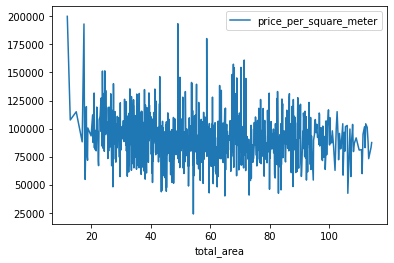

In [96]:
final_data.groupby('total_area').agg({'price_per_square_meter': 'median'}).plot()

<AxesSubplot:xlabel='rooms'>

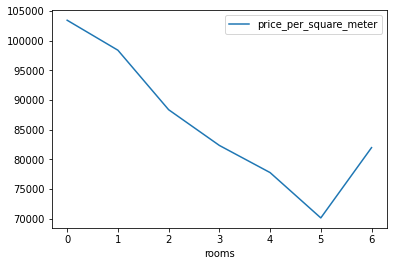

In [97]:
final_data.groupby('rooms').agg({'price_per_square_meter': 'median'}).plot()

<AxesSubplot:xlabel='floor'>

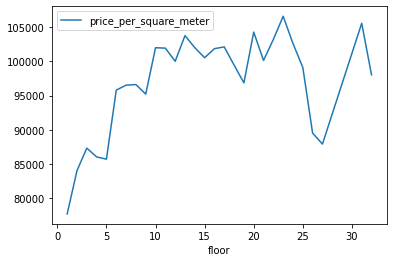

In [98]:
final_data.groupby('floor').agg({'price_per_square_meter': 'median'}).plot()

<AxesSubplot:xlabel='city_centers_nearest'>

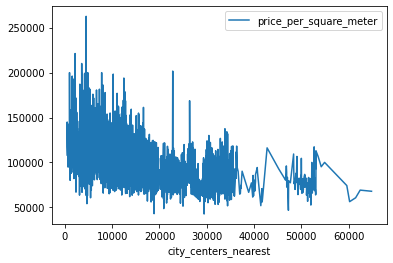

In [99]:
final_data.groupby('city_centers_nearest').agg({'price_per_square_meter': 'median'}).plot()

<AxesSubplot:xlabel='year'>

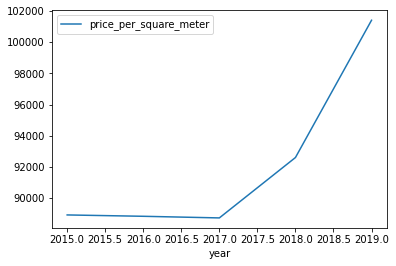

In [100]:
final_data.groupby('year').agg({'price_per_square_meter': 'median'}).plot()

На основании проведенного анализа зависимости цены квадратного метра от выбранных параметров можно сделать следующие выводы:
1. Площадь объекта недвижимости оказывает самое слабое влияние на цену квадратного метра
2. Наблюдем прямую зависимость стоимости квадратного метра от количества комнат, чем больше комнат в кватире тем меньше стоимость квадратного метра
3. Судя по цене за квадратный метр предпочтение отдаеется этажам расположенным в середине дома, "крайние" этажи не пользуются большим спросом
4. Удаленность от центра города оказывает значительное влияние на стоимость объекта недвижимости, выраженную в данном случае в стоимости за квадратный метр, чем дальше объект расположен от центра города, тем ниже его стоимость
5. После 2017 года наблюдаем резкий рост цен на рынке недвижимоти, скорее всего это связано с развитием льготной ипотеки. Рост спроса на недвижимоть привел к росту цен на рынке. Как говорится "законы экономики работают, даже если они нам не нравяться".

Для составления списка данных для 10 городом используем сводную таблицу

In [101]:
ten_cities = final_data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])
ten_cities.columns = ['count', 'mean']
ten_cities.sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,7674,103441.093432
посёлок Мурино,359,85703.295265
посёлок Шушары,310,77964.858065
Всеволожск,253,67007.537549
посёлок Парголово,229,89048.183406
деревня Кудрово,212,92918.707547
Колпино,207,74289.956522
Гатчина,187,67326.368984
Пушкин,187,97928.368984


На основании анализа данные среди городов с самым большим количеством объявлений самая высокая цена квадратного метра жилья в Санкт-Петербурге, самая низкая в Выборге

In [102]:
data['city_centers_km'] = round(data['city_centers_nearest'] / 1000, 0)
data['final_data'] = data['city_centers_km'].astype('int', errors='ignore')
final_data = data[(data['final_large_area'] == False) & 
     (data['final_expensive'] == False) &
     (data['final_rooms'] == False) &
     (data['final_ceiling'] == False) &
     (data['slow_sale'] == False) &
     (data['fast_sale'] == False)].reset_index(drop=True)

final_data.loc[(final_data['locality_name'] == 'Санкт-Петербург') & (final_data['city_centers_km'].notna()), 'city_centers_km'].apply(round)
spb_city = final_data.query('locality_name == "Санкт-Петербург"')
spb_center = spb_city.pivot_table(index='final_data', values=['price_per_square_meter', 'last_price'], aggfunc='median')
spb_center.head()

,last_price,price_per_square_meter
final_data,,
0.0,6100000,126560.0
1.0,7700000,106172.0
2.0,8200000,112307.0
3.0,6250000,106394.0
4.0,6900000,112333.0


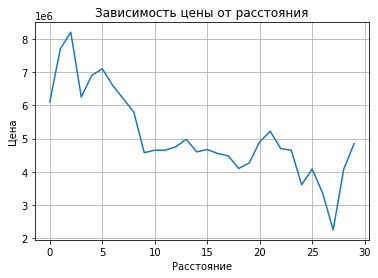

In [103]:
sns.lineplot(x=spb_center.index, y='last_price', data=spb_center).grid ()
plt.title('Зависимость цены от расстояния')
plt.ylabel('Цена')
plt.xlabel('Расстояние')
plt.show()

Изучив график видим, что резкое падение стоимости происходит на растоянии 7 километров от центра города. Возьмеи за центральную зону расстояние до 7 киломестров

In [104]:
spb_center = final_data[(final_data['city_centers_km'] <= 7) & (final_data['locality_name'] == 'Санкт-Петербург')]
spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,825.000000,8.250000e+02,825.000000,825.00000
mean,61.519491,7.086143e+06,2.122424,2.65703
std,20.054537,2.141633e+06,0.915505,0.07126
min,12.000000,2.400000e+06,0.000000,2.46000
25%,45.000000,5.400000e+06,1.000000,2.65000
50%,60.000000,6.850000e+06,2.000000,2.65000
75%,75.000000,8.600000e+06,3.000000,2.65000
max,114.200000,1.186686e+07,6.000000,2.85000


<AxesSubplot:xlabel='total_area'>

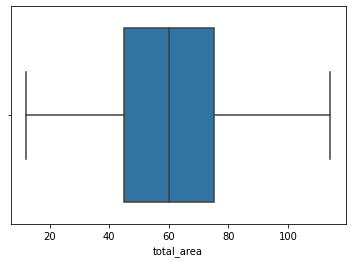

In [105]:
sns.boxplot(spb_center['total_area'])

<AxesSubplot:xlabel='last_price'>

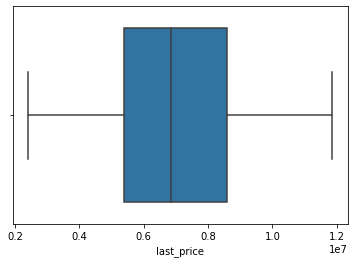

In [106]:
sns.boxplot(spb_center['last_price'])

<AxesSubplot:xlabel='rooms'>

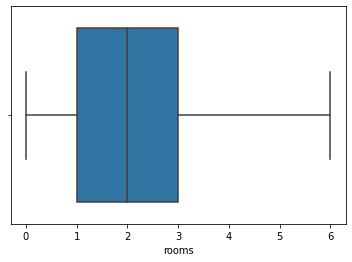

In [107]:
sns.boxplot(spb_center['rooms'])

<AxesSubplot:xlabel='ceiling_height'>

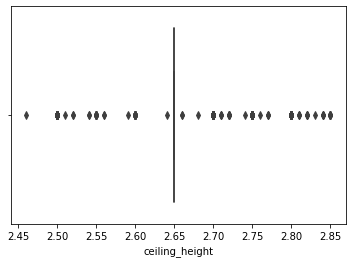

In [108]:
sns.boxplot(spb_center['ceiling_height'])

На основании данных можно сделать следующие выводы - средняя площадь продаваемых квартир в центре Санкт-Петербурга больше чем в общих данных ( 60 кв.м. и 52 соотвественно), по прежнему чаше на рынке преставлены двхкомнатные квартиры, средняя цена ожидаемо выше в центре Санк-Петербрга по отношению с общими данными (6,8 млн. рублей центр гоода и 4,8 для общих данных, средняя высота потолков не отличается.

In [109]:
corr = spb_center[['last_price',\
                   'total_area',\
           'rooms',\
           'floor',\
           'city_centers_nearest',\
           'day',\
           'month',\
            'year'    
               ]].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,rooms,floor,city_centers_nearest,day,month,year
last_price,1.000000,0.711748,0.437353,0.186780,-0.082105,-0.023704,0.024786,0.053670
total_area,0.711748,1.000000,0.787087,-0.024106,-0.161252,-0.064627,0.055499,-0.088546
rooms,0.437353,0.787087,1.000000,-0.131416,-0.157678,-0.097201,0.062910,-0.071548
floor,0.186780,-0.024106,-0.131416,1.000000,0.318860,0.044571,0.042245,0.054495
city_centers_nearest,-0.082105,-0.161252,-0.157678,0.318860,1.000000,0.051878,0.050245,0.079576
day,-0.023704,-0.064627,-0.097201,0.044571,0.051878,1.000000,-0.043024,-0.087326
month,0.024786,0.055499,0.062910,0.042245,0.050245,-0.043024,1.000000,-0.167846
year,0.053670,-0.088546,-0.071548,0.054495,0.079576,-0.087326,-0.167846,1.000000


На основании анализа данных можно сделать следующие выводы. На стоимость квартиры, как в центре Санкт-Петербурга, так и в общих данных значительное влияние оказывают количество комнат и общая площадь помещения. Этаж расположения квартиры как для центральной части Санкт-Пербурга, так и по базе данных оказывает слабое влияние на цену объекта. А вот расстояние от центральной части города в Санкт-Петербурге значительно влияет на стоимость квартиры, нежели в общих данных по области. Чем дальше от центра Санкт-Петербурга, тем быстрее снижается цена. Даты публикации объявлений также как и по базе данных в целом оказывают довольно слабое влияние на цену квартиры.

Комментарий студента: по аналогии с анализом базы данных об объектах недвижимости в целом по Ленинградской области, применим анализ нелинейной зависимости построив графики медианной цены для центральной части Санкт-Петербурга

<AxesSubplot:xlabel='total_area'>

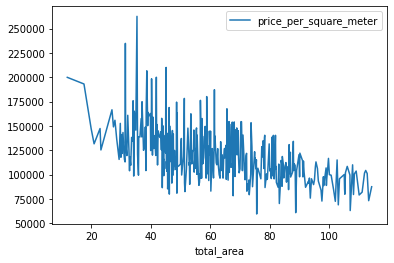

In [110]:
spb_center.groupby('total_area').agg({'price_per_square_meter': 'median'}).plot()

<AxesSubplot:xlabel='rooms'>

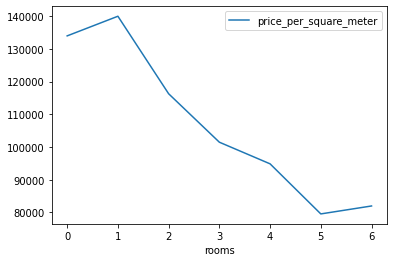

In [111]:
spb_center.groupby('rooms').agg({'price_per_square_meter': 'median'}).plot()

<AxesSubplot:xlabel='floor'>

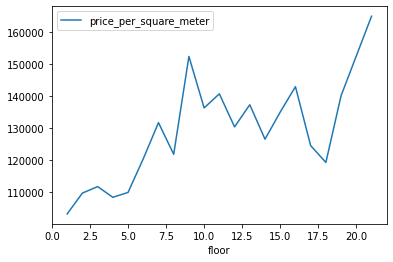

In [112]:
spb_center.groupby('floor').agg({'price_per_square_meter': 'median'}).plot()

<AxesSubplot:xlabel='city_centers_nearest'>

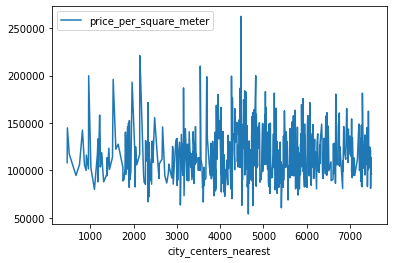

In [113]:
spb_center.groupby('city_centers_nearest').agg({'price_per_square_meter': 'median'}).plot()

<AxesSubplot:xlabel='year'>

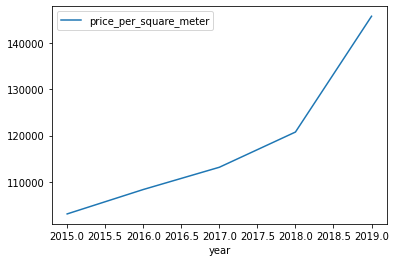

In [114]:
spb_center.groupby('year').agg({'price_per_square_meter': 'median'}).plot()

На основании проведенного анализа,для объектов недвижимости расположенных в центральной части Санкт-Петербурга, зависимости цены квадратного метра от выбранных параметров можно сделать следующие выводы:
1. В квартирах большей площадью стоимость квадратного метра ниже
2. Этот эффектмы видим на графике с колличеством комнат в объекте недвижимоти, чем больше комнат тем ниже стоимость квадратного метра
3. Для центра большого мегаполиса характерно, что покупатели начинаю отдавать предпочтение верхним этажам
4. По всей центральной части Санкт-Петербурга наблюдаем равномерное распределение стоимости за квадратный метр, без существеного снижения от центральной части к границам
5. Как видно из графика распредения данных по годам, наблюдался устойчивый рост цен на рынке недвижимости, но и сдесь можно отметить достаточно резкий скачек после 2018 года

## Общий вывод

После проведенных исследований можно сделать выводы:
1. Самые распростанненых квартиры представленные на рыенке недвижимости Санкт-Терербурга и окресных говодов - это двухкомнатная квартира площадью 50-60 квадратных метров
2. Влияние на цену этажа расположения квартиры снижается ближе к центральным районам городов
3. Растояние от центра города оказывает значительное вляние на стоимость квартиры, центральные районы всегда предпочтительнее окраин.



# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод